<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">ÉTUDE DE MARCHÉ "LA POULE QUI CHANTE (suite)"</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">PARTIE 2</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">I - IMPORTATION DES LIBRAIRIES</h3>
</div>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

sns.set()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">II - IMPORTATION DU FICHIER DE BASE</h3>
</div>

In [2]:
# Importation du fichier de base
df_cocoricoo = pd.read_csv("cocorico.csv")
display(df_cocoricoo.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Angola,-0.646,2309.522,-2.155,36749906.0,3.128599,6503.0,3.0,0.0,277.0,42.0
1,Albanie,0.115,8367.776,4.634,2811655.0,-0.564187,1601.0,6.0,0.0,38.0,13.0
2,Émirats arabes unis,0.701,52976.808,2.581,10642081.0,3.905395,5240.0,14.0,94.0,433.0,48.0
3,Argentine,-0.009,13730.515,-2.436,45538401.0,0.287388,11051.0,13.0,207.0,8.0,2161.0
4,Arménie,-0.797,8715.765,8.798,2943393.0,2.170105,3431.0,5.0,0.0,35.0,11.0


<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">III - LE LOGARITHME NEPERIEN</h3>
</div>

In [3]:
## Utilisation du logarithme népérien pour "lisser" les valeurs de la colonne "pop".
## L'idée est que la Chine et l'Inde ne se retrouve pas dans un cluster, en raison de leur population extremement élevée. 

In [4]:
df_cocoricoo['log_pop_nbr_2023'] = np.log(df_cocoricoo['pop_nbr_2023'])

In [5]:
# Replacement de la colonne pop_nbr_2023 par la colonne log_pop_nbr_2023
df_cocoricoo['pop_nbr_2023'] = df_cocoricoo['log_pop_nbr_2023']

# Suppression de la colonne log_pop_2018
df_cocoricoo.drop('log_pop_nbr_2023', axis=1, inplace=True)

# Renommage de la colonnne pop(nbr_2018)
df_cocoricoo.rename(columns={'pop_nbr_2023': 'log_pop_nbr_2023'}, inplace=True)

display(df_cocoricoo.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Angola,-0.646,2309.522,-2.155,17.419646,3.128599,6503.0,3.0,0.0,277.0,42.0
1,Albanie,0.115,8367.776,4.634,14.849284,-0.564187,1601.0,6.0,0.0,38.0,13.0
2,Émirats arabes unis,0.701,52976.808,2.581,16.180327,3.905395,5240.0,14.0,94.0,433.0,48.0
3,Argentine,-0.009,13730.515,-2.436,17.634067,0.287388,11051.0,13.0,207.0,8.0,2161.0
4,Arménie,-0.797,8715.765,8.798,14.895074,2.170105,3431.0,5.0,0.0,35.0,11.0


In [6]:
# Comptabilisation des pays uniques
cocoricoo_nbr_pays = df_cocoricoo['Pays'].nunique()

# Afficher le résultat
print("Nombre de pays uniques :", cocoricoo_nbr_pays)

Nombre de pays uniques : 125


In [7]:
# Changement de l'index = colonne Pays
df_cocorico = df_cocoricoo.set_index('Pays')
display(df_cocorico.head())

,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
Pays,,,,,,,,,,
Angola,-0.646,2309.522,-2.155,17.419646,3.128599,6503.0,3.0,0.0,277.0,42.0
Albanie,0.115,8367.776,4.634,14.849284,-0.564187,1601.0,6.0,0.0,38.0,13.0
Émirats arabes unis,0.701,52976.808,2.581,16.180327,3.905395,5240.0,14.0,94.0,433.0,48.0
Argentine,-0.009,13730.515,-2.436,17.634067,0.287388,11051.0,13.0,207.0,8.0,2161.0
Arménie,-0.797,8715.765,8.798,14.895074,2.170105,3431.0,5.0,0.0,35.0,11.0


<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">IV - CENTRER REDUIRE </h3>
</div>

In [8]:
## Utilisation de la notion de centrer réduire afin de mettre toutes les variables sur un pied d'égalité,
## et ainsi les rendre comparable (homogénéisation des variables pour faciliter leur interprétation).

In [9]:
# Sélection des colonnes numériques à standardiser
num_cols = df_cocorico.select_dtypes(include=['number']).columns

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement et transformation les données
df_cocorico[num_cols] = scaler.fit_transform(df_cocorico[num_cols])

# Arrondissement de toutes les colonnes numériques à 3 chiffres après la virgule
df_cocorico = df_cocorico.round(3)

display(df_cocorico.head())

,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
Pays,,,,,,,,,,
Angola,-0.762,-0.737,-1.056,0.667,-0.065,0.268,-0.835,-0.260,0.869,-0.315
Albanie,0.183,-0.488,0.741,-0.791,-0.111,-0.961,-0.230,-0.260,-0.342,-0.325
Émirats arabes unis,0.911,1.346,0.198,-0.036,-0.055,-0.048,1.381,-0.082,1.660,-0.313
Argentine,0.029,-0.268,-1.130,0.789,-0.100,1.409,1.179,0.132,-0.494,0.427
Arménie,-0.949,-0.474,1.843,-0.765,-0.077,-0.502,-0.432,-0.260,-0.357,-0.326


<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">V - MATRICE DE CORRELATION ENTRE LES VARIABLES </h3>
</div>

In [10]:
## L'idée est de visualiser les corrélations positives / négatives fortes entre les différentes variables.

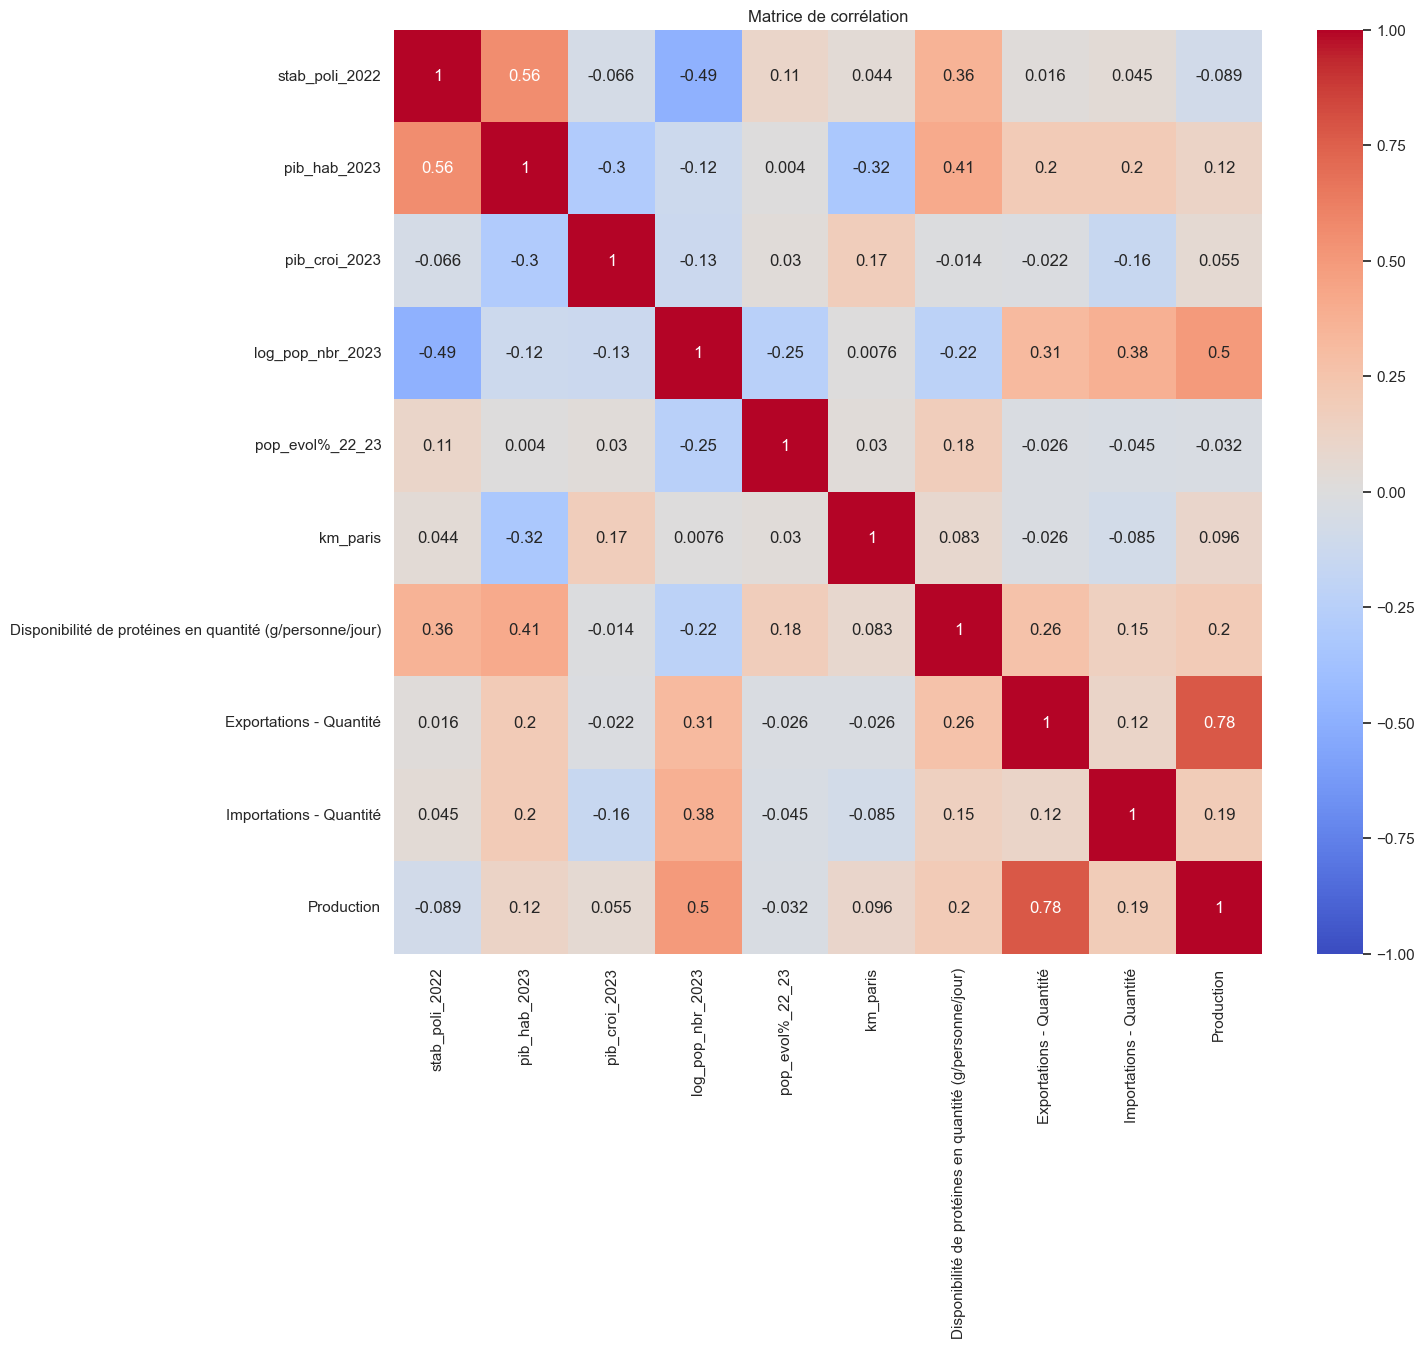

In [11]:
# Création d'une matrice de corrélation
df_corrélation = df_cocorico.corr()

# Visualisation à l'aide d'une heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df_corrélation, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Matrice de corrélation')
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VI - L'ANALYSE EN COMPOSANTES PRINCIPALES (ACP) </h3>
</div>

In [12]:
## L’ACP permet la création une vision synthétique et simplifiée de données complexes.
## Elle permet de transformer un ensemble de données avec plusieurs variables corrélées, en un nouvel ensemble de variables dé-corrélées appelées composantes principales.
## Ces nouvelles variables sont choisies de manière à capturer le maximum de variance des données initiales.

In [13]:
# Enregistrement des noms d'index dans une variable
names = df_cocorico.index
names

Index(['Angola', 'Albanie', 'Émirats arabes unis', 'Argentine', 'Arménie',
       'Antigua-et-Barbuda', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Belgique',
       ...
       'Turquie', 'Ouganda', 'Ukraine', 'Uruguay', 'États-Unis', 'Viet Nam',
       'Samoa', 'Yémen, Rép. du', 'Afrique du Sud', 'Zambie'],
      dtype='object', name='Pays', length=125)

In [14]:
# Enregistrement des noms des colonnes dans une variable
features = df_cocorico.columns
features

Index(['stab_poli_2022', 'pib_hab_2023', 'pib_croi_2023', 'log_pop_nbr_2023',
       'pop_evol%_22_23', 'km_paris',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Importations - Quantité', 'Production'],
      dtype='object')

In [15]:
# Sélection des colonnes numériques
num_cols2 = df_cocorico.select_dtypes(include=['number']).columns

In [16]:
## LA REALISATION DE L'ACP ET DU SCREE PLOT = La détermination du nombre de clusters optimals

In [17]:
# Standardisation des données
scaler = StandardScaler()
df_cocorico_apc = scaler.fit_transform(df_cocorico[num_cols])

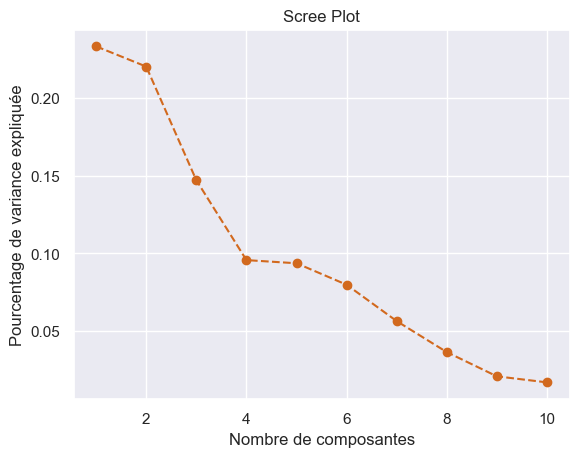

In [18]:
# Réalisation de l'ACP sans fixer le nombre de composantes
pca = PCA()
principalComponents = pca.fit(df_cocorico_apc)

# Pourcentage de variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Visualisation du scree plot
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color="chocolate")
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes')
plt.ylabel('Pourcentage de variance expliquée')
plt.show()

In [19]:
# Vérification d'une moyenne à 0 et d'un ecart-type à 1.
idx = ["mean", "std"]
pd.DataFrame(df_cocorico_apc).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
## REALISATION DE L'ACP AVEC CHOIX DU NOMBRE DE CLUSTERS

In [21]:
# Travail sur les 4 premières composantes 
n_components = 4

# Intensification de l'ACP
pca = PCA(n_components=n_components)

# Entrainement sur les données scalées
pca.fit(df_cocorico_apc)

PCA(n_components=4)

In [22]:
## L'EBOULIS DES VALEURS PROPRES = une autre manière de visualiser le scree plot

In [23]:
# Observation de la variance captée par chaque nouvelle composante
pca.explained_variance_ratio_

# Enregistrement dans une nouvelle variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

# Représentation de la somme cumulée de la variance
scree_cum = scree.cumsum().round()
scree_cum

# Définition d'une variable à partir de la liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

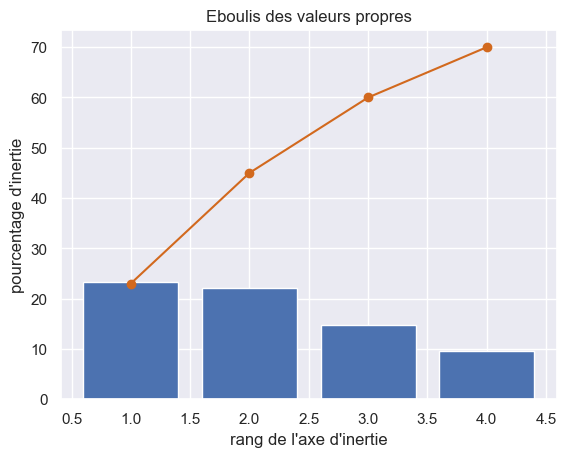

In [24]:
# Affichage d'un graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="chocolate",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Bleu = variance de chaque nouvelle composante
## Rouge = variance cumulée

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VI.1 - L'interprétation de l'ACP : heatmap </h3>
</div>

In [25]:
## La heatmap permet de visialiser les corrélations entre les variables et les composantes principales.

In [26]:
# Observation des composantes 
pcs = pca.components_
pcs

array([[ 0.01542224,  0.26733729, -0.13268498,  0.38320287, -0.0764825 ,
        -0.057191  ,  0.23684409,  0.53423233,  0.32539989,  0.5543811 ],
       [ 0.55891422,  0.49217115, -0.1278204 , -0.43429261,  0.1983512 ,
        -0.10911257,  0.41378555, -0.01860679,  0.01071099, -0.13231081],
       [ 0.07374493, -0.24856877,  0.51163394, -0.18702265,  0.2742892 ,
         0.52078661,  0.27034288,  0.24451691, -0.28343208,  0.27634707],
       [ 0.09850072, -0.11796906, -0.14464228,  0.17181208,  0.08959265,
         0.58486575,  0.17254678, -0.33200986,  0.64130921, -0.15673193]])

In [27]:
# Affichange des composantes, version Pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.015422,0.267337,-0.132685,0.383203,-0.076482,-0.057191,0.236844,0.534232,0.325400,0.554381
1,0.558914,0.492171,-0.127820,-0.434293,0.198351,-0.109113,0.413786,-0.018607,0.010711,-0.132311
2,0.073745,-0.248569,0.511634,-0.187023,0.274289,0.520787,0.270343,0.244517,-0.283432,0.276347
3,0.098501,-0.117969,-0.144642,0.171812,0.089593,0.584866,0.172547,-0.332010,0.641309,-0.156732


In [28]:
features[0:]

Index(['stab_poli_2022', 'pib_hab_2023', 'pib_croi_2023', 'log_pop_nbr_2023',
       'pop_evol%_22_23', 'km_paris',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Importations - Quantité', 'Production'],
      dtype='object')

In [29]:
pcs.columns = features[0:]
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
F1,0.02,0.27,-0.13,0.38,-0.08,-0.06,0.24,0.53,0.33,0.55
F2,0.56,0.49,-0.13,-0.43,0.20,-0.11,0.41,-0.02,0.01,-0.13
F3,0.07,-0.25,0.51,-0.19,0.27,0.52,0.27,0.24,-0.28,0.28
F4,0.10,-0.12,-0.14,0.17,0.09,0.58,0.17,-0.33,0.64,-0.16


In [30]:
# Autre représentation du df
pcs.T

,F1,F2,F3,F4
stab_poli_2022,0.015422,0.558914,0.073745,0.098501
pib_hab_2023,0.267337,0.492171,-0.248569,-0.117969
pib_croi_2023,-0.132685,-0.127820,0.511634,-0.144642
log_pop_nbr_2023,0.383203,-0.434293,-0.187023,0.171812
pop_evol%_22_23,-0.076482,0.198351,0.274289,0.089593
km_paris,-0.057191,-0.109113,0.520787,0.584866
Disponibilité de protéines en quantité (g/personne/jour),0.236844,0.413786,0.270343,0.172547
Exportations - Quantité,0.534232,-0.018607,0.244517,-0.332010
Importations - Quantité,0.325400,0.010711,-0.283432,0.641309
Production,0.554381,-0.132311,0.276347,-0.156732


<Axes: >

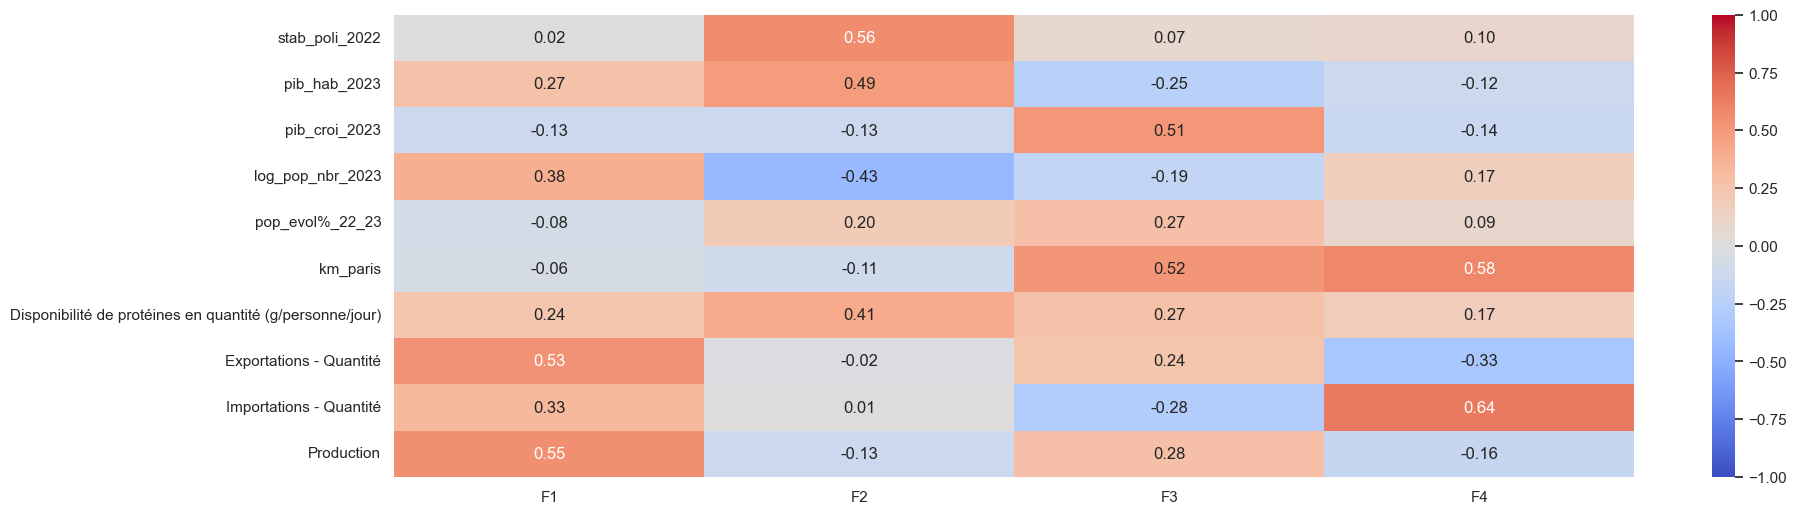

In [31]:
# Représentation visuelle
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VI.2 - L'interprétation de l'ACP : cercles de corrélation </h3>
</div>

In [32]:
## Les cercles de corrélations permettent de visualiser la relations entre les variables et les axes factoriels.

In [33]:
# Définition d'une fonction de corrélation
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extraction de x et y 
    x,y=x_y

    # Définition de la taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Affichage du nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Création du cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Axes et affichage
    plt.axis('equal')
    plt.show(block=False)

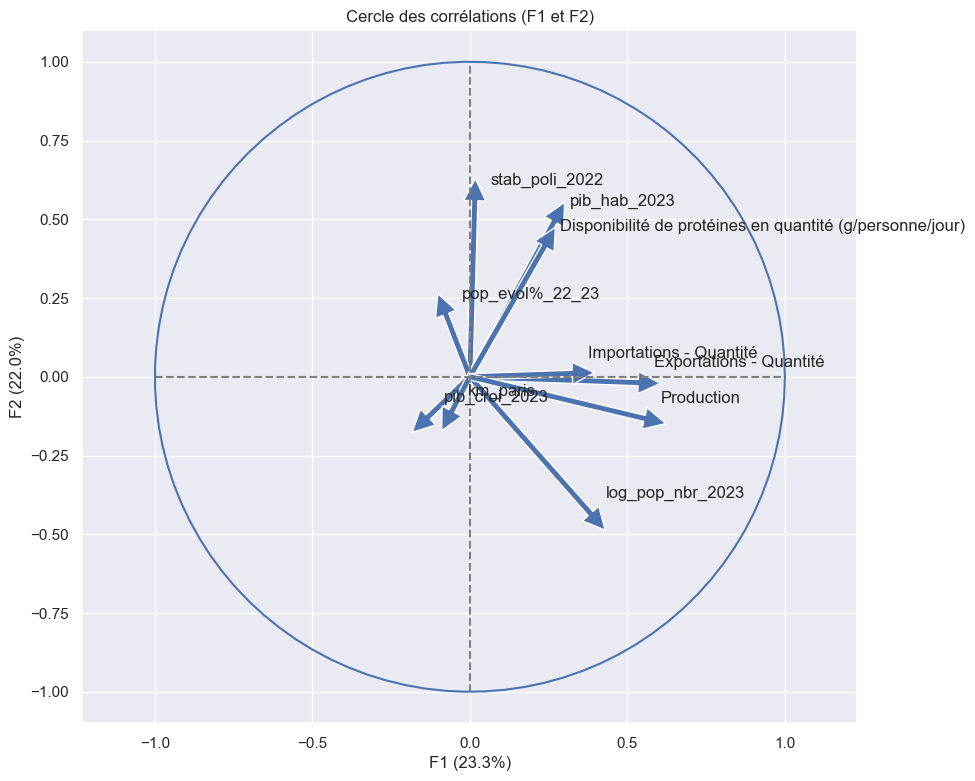

In [34]:
# Définition de F1 et de F2
x_y = (0,1)
x_y

# Affichage du cercle de corrélation F1 et F2 en utilisant une fonction 
correlation_graph(pca, x_y, features)

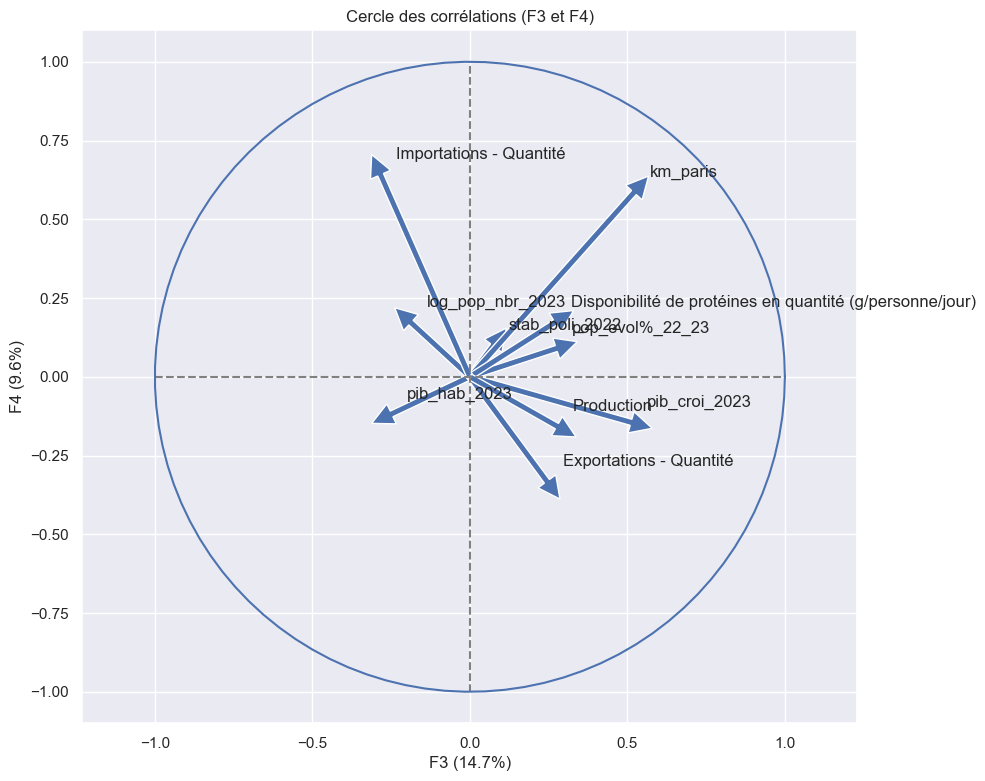

In [35]:
# Affichage du cercle de corrélation F3 et F4 en utilisant une fonction 
correlation_graph(pca, (2,3), features)

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VII - TECHNIQUE DE CLUSTERING N°1 : LA CLASSIFICATION ASCENDANTE HIERARCHIQUE (CAH) / DENDROGRAMME</h3>
</div>

In [36]:
## Le dendrogramme permet d'identifier le nombre de clusters optimals.

In [37]:
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
# Calcul des distances avec la matrice Z
Z = linkage(df_cocorico, method="ward")

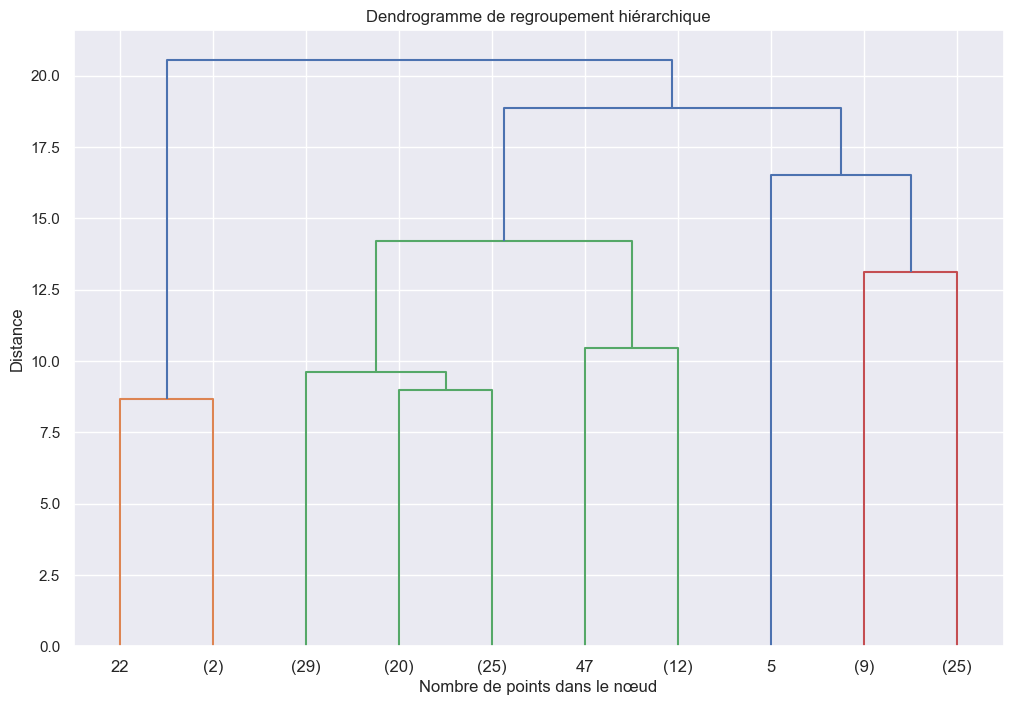

In [39]:
# Affichage du dendrogramme (10 clusters pour ne pas avoir un arbre illisible)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud")
plt.ylabel("Distance")
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VIII - TECHNIQUE DE CLUSTERING N°2 : LE K-MEANS</h3>
</div>

In [40]:
# Importation des librairies
from sklearn import datasets
from sklearn.cluster import KMeans

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VIII.1 - Identification du nombre de clusters : L'analyse du coude</h3>
</div>

In [41]:
## L'analyse du coude permet de visualiser le nombre optimal de cluster à utiliser dans le k-means.

In [42]:
# Enregistrement des inerties dans une liste vide  
intertia_list = [ ]

# Test du nombre de clusters : 
k_list = range(1, 10)

# Mise en place d'une boucle pour tester chaque nombre de clusters : 
for k in k_list : 
    
    # Définition d'un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Entrainement
    kmeans.fit(df_cocorico)
    
    # Enregistrement de l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

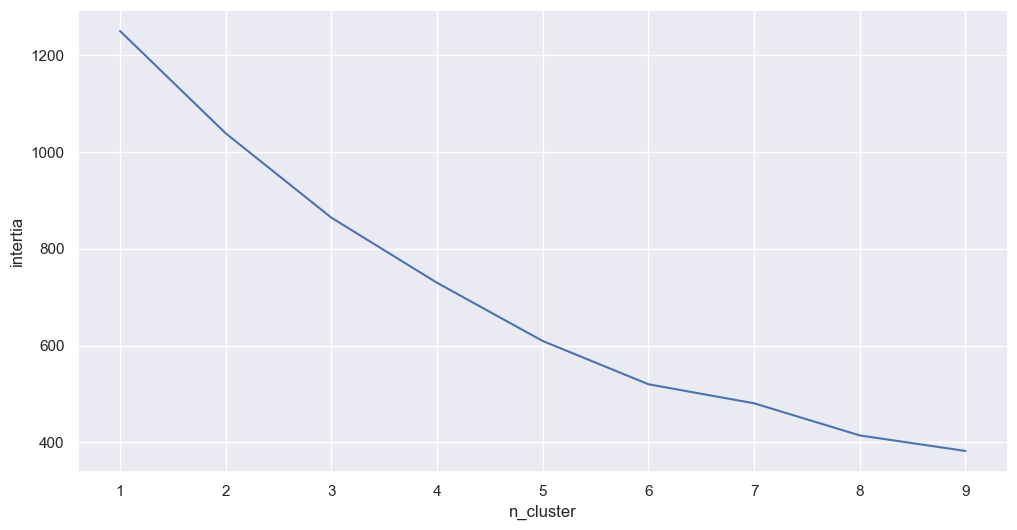

In [43]:
# Affichage du graphique du coude
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VIII.2 - Identification du nombre de clusters : Le coefficient de silhouette</h3>
</div>

In [44]:
# Le coefficient de silhouette permet d'évaluer la qualité d'un clustering.

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du coefficient de silhouette pour chaque échantillon
# ==> Donne la moyenne du coefficient de silhouette pour tous les échantillons.
# ==> Plus cette valeur est proche de 1, meilleure est la qualité du clustering.
silhouette_avg = silhouette_score(df_cocorico, kmeans.labels_)
print("La moyenne du coefficient de silhouette est :", silhouette_avg)

# Calcule des coefficients de silhouette pour chaque échantillon
# ==> Contient un tableau avec le coefficient de silhouette pour chaque échantillon.
# ==> Identifie les échantillons qui sont mal classés (coef proche de -1) ou qui sont près deux clusters (coef proche de 0).
sample_silhouette_values = silhouette_samples(df_cocorico, kmeans.labels_)

La moyenne du coefficient de silhouette est : 0.2298257430171106


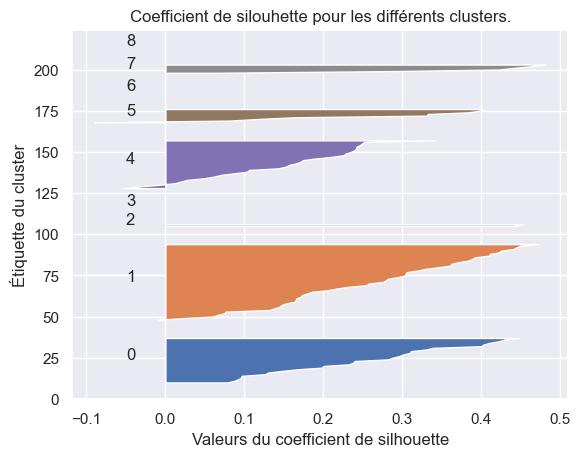

In [46]:
# Création d un graphique pour visualiser les coefficients de silhouette
y_lower = 10
for i in range(k):
    # Agrégation des scores de silhouette pour les échantillons appartenant au cluster i
    ith_cluster_silhouette_values = \
        sample_silhouette_values[kmeans.labels_ == i]

    # Tri des scores
    ith_cluster_silhouette_values.sort()

    # Taille du cluster i
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Création des barres pour chaque cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)

    # Étiquetage eds plots de silhouette avec les numéros de cluster au milieu
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul du nouveau y_lower pour le prochain plot
    y_lower = y_upper + 10

plt.title("Coefficient de silouhette pour les différents clusters.")
plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Étiquette du cluster")

plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">VIII.3 - Réalisation du k-means</h3>
</div>

In [47]:
# Importation des librairies
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
# Calcul de la projection de chaque centroïde sur le premier plan factoriel pour l’afficher
# Identification des clusterings

# Définition du K-means avec 6 clusters : 
kmeans = KMeans(n_clusters=6)

# Entrainement : 
kmeans.fit(df_cocorico)

# Stockage des clusters dans une variable labels : 
labels = kmeans.labels_
labels

C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 4, 5, 0, 4, 3, 0, 1, 4, 1, 4, 1, 4, 4, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 4, 4, 4, 4, 0, 1, 1, 5, 1, 0, 4, 4, 4, 1, 1, 1, 0, 5, 0, 5, 4,
       4, 4, 4, 0, 4, 1, 1, 4, 4, 1, 4, 4, 1, 1, 1, 0, 4, 5, 4, 4, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 4, 4, 5, 4, 1, 4, 0, 0, 0, 4, 4, 4, 5, 1, 0,
       1, 4, 0, 4, 4, 1, 1, 4, 1, 4, 4, 5, 4, 0, 4, 4, 4, 0, 1, 1, 1, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 2, 4, 0, 4, 5, 4])

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">IX - L'INTERPRETATION DES CLUSTERS</h3>
</div>

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">IX.1 - La projection des points par clusters</h3>
</div>

In [49]:
## LA PROJECTION DES POINTS SIMPLE

In [50]:
# Stockage des centroïdes dans une variable
centroids = kmeans.cluster_centers_
centroids

array([[ 0.70943478, -0.19852174,  0.47047826, -0.77256522, -0.09191304,
         1.24417391,  0.65404348, -0.22182609, -0.41504348, -0.21252174],
       [ 0.8099    ,  1.07446667, -0.5647    , -0.37936667, -0.09003333,
        -0.91426667,  0.4141    , -0.05886667, -0.12966667, -0.20576667],
       [-0.29366667,  0.598     ,  0.37333333,  2.11166667, -0.10066667,
         0.559     ,  1.045     ,  5.094     ,  0.442     ,  6.01566667],
       [ 1.213     ,  0.054     ,  0.381     , -2.722     , 11.134     ,
         0.319     ,  1.985     , -0.26      , -0.499     , -0.329     ],
       [-0.74586441, -0.61332203,  0.14018644,  0.30189831, -0.08861017,
        -0.01215254, -0.6570339 , -0.19842373, -0.25815254, -0.14562712],
       [ 0.33977778,  0.74166667, -0.406     ,  0.858     , -0.08777778,
        -0.27433333,  0.687     ,  0.39377778,  3.09411111,  0.21433333]])

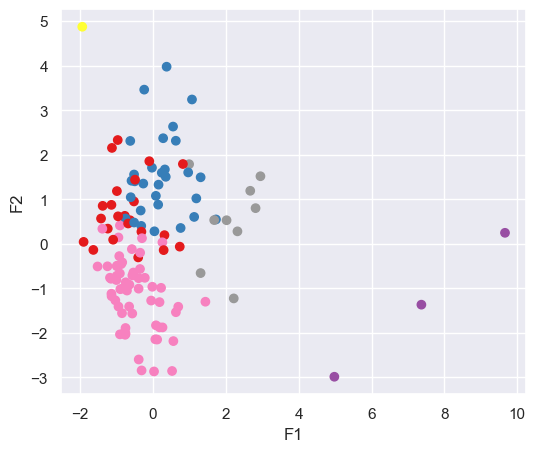

In [51]:
# Réalisation d'une ACP pour accéder à la visualisation des données

# Scalage des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cocorico)

# Réalisation de l'ACP 
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Projection dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
X_proj[:10]

# Affichage des points
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [52]:
## LA PROJECTIONS DES POINTS AVEC LEURS CENTROÏDES

In [53]:
# Zoom sur les centroïdes : scalage et projection dans le nouvel espace

# Utilisation du scaler déjà entrainé : 
centroids_scaled = scaler.transform(centroids)

# Utilisation de l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4", "F5", "F6"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"])

display(centroids_proj.head())

C:\Users\Yassine\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,F1,F2,F3,F4,F5,F6
cluster_0,-0.681161,0.718586,1.291186,0.565573,-0.747916,-0.256126
cluster_1,0.198873,1.498566,-0.848670,-0.533252,-0.118148,-0.029450
cluster_2,7.338452,-1.369153,2.954607,-1.643116,-0.008990,-0.646284
cluster_3,-1.943709,4.875903,4.523675,0.934754,9.277008,-0.353168
cluster_4,-0.497243,-1.135743,-0.111081,-0.174852,0.154513,-0.036374


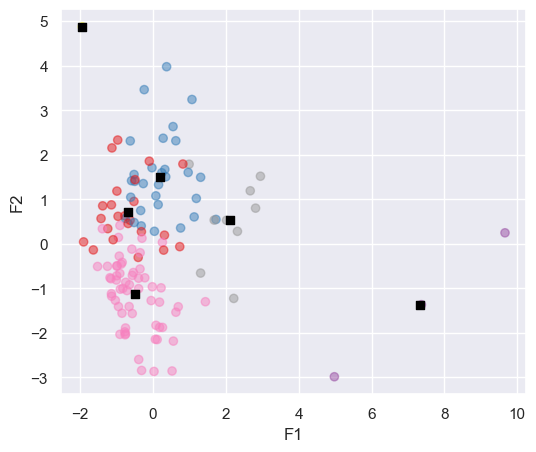

In [54]:
# Affichage du graphique pour F1 et F2

# Définition de la figure et de son axe : 
fig, ax = plt.subplots(1,1, figsize=(6,5))

# Affichage des individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# Affichage des centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# Spécification des axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">IX.2 - La boîte à moustache</h3>
</div>

In [55]:
## La boîte à moustaches permet d’identifier les caractéristiques des données et de comparer plusieurs distributions.
## J'ai réalisé ce travail pour toutes mes variables.

In [56]:
# Réinitialiser l'index et créer une nouvelle colonne 'Pays' à partir de l'ancien index
df_cocorico = df_cocorico.reset_index()

# Réordonner les colonnes pour mettre 'Pays' en première position
cols = df_cocorico.columns.tolist()
cols = [cols[0]] + cols[1:]
df_cocorico = df_cocorico[cols]

display(df_cocorico.head())

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Angola,-0.762,-0.737,-1.056,0.667,-0.065,0.268,-0.835,-0.260,0.869,-0.315
1,Albanie,0.183,-0.488,0.741,-0.791,-0.111,-0.961,-0.230,-0.260,-0.342,-0.325
2,Émirats arabes unis,0.911,1.346,0.198,-0.036,-0.055,-0.048,1.381,-0.082,1.660,-0.313
3,Argentine,0.029,-0.268,-1.130,0.789,-0.100,1.409,1.179,0.132,-0.494,0.427
4,Arménie,-0.949,-0.474,1.843,-0.765,-0.077,-0.502,-0.432,-0.260,-0.357,-0.326


In [57]:
# Création d'un nouveau df avec les colonnes 'Pays' et 'Cluster'
df_resultats_kmeans = pd.DataFrame({'Pays': df_cocorico['Pays'], 'Cluster': labels})

# Affichage du DataFrame
display(df_resultats_kmeans.head())

,Pays,Cluster
0,Angola,4
1,Albanie,4
2,Émirats arabes unis,5
3,Argentine,0
4,Arménie,4


In [58]:
# Création d'une jointure entre df_cocorico et df_resultats_kmeans
df_merged = pd.merge(df_cocorico, df_resultats_kmeans, on='Pays', how='inner')
df_merged

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Cluster
0,Angola,-0.762,-0.737,-1.056,0.667,-0.065,0.268,-0.835,-0.260,0.869,-0.315,4
1,Albanie,0.183,-0.488,0.741,-0.791,-0.111,-0.961,-0.230,-0.260,-0.342,-0.325,4
2,Émirats arabes unis,0.911,1.346,0.198,-0.036,-0.055,-0.048,1.381,-0.082,1.660,-0.313,5
3,Argentine,0.029,-0.268,-1.130,0.789,-0.100,1.409,1.179,0.132,-0.494,0.427,0
4,Arménie,-0.949,-0.474,1.843,-0.765,-0.077,-0.502,-0.432,-0.260,-0.357,-0.326,4
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Viet Nam,0.002,-0.654,0.661,1.237,-0.095,0.943,-0.633,-0.258,0.940,-0.008,4
121,Samoa,1.381,-0.662,1.212,-2.245,-0.096,2.672,2.791,-0.260,-0.448,-0.329,0
122,"Yémen, Rép. du",-3.036,-0.811,-0.941,0.707,-0.066,-0.030,-0.835,-0.260,-0.139,-0.271,4
123,Afrique du Sud,-0.856,-0.575,-0.555,0.975,-0.087,0.816,1.381,-0.141,2.070,0.254,5


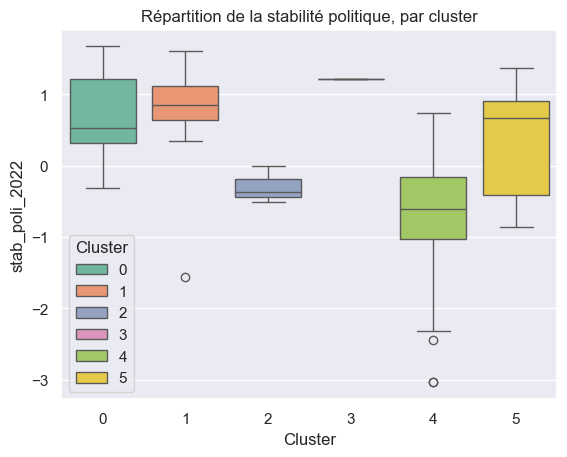

In [59]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='stab_poli_2022', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition de la stabilité politique, par cluster')
plt.show()

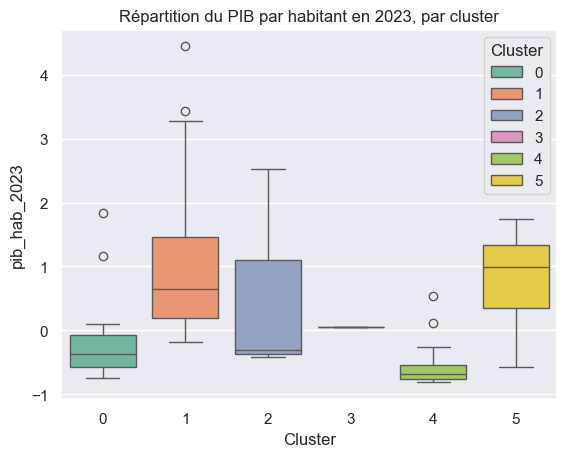

In [60]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='pib_hab_2023', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition du PIB par habitant en 2023, par cluster')
plt.show()

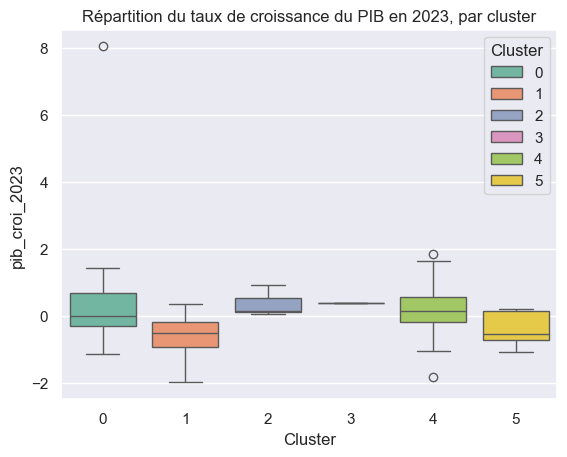

In [61]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='pib_croi_2023', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition du taux de croissance du PIB en 2023, par cluster')
plt.show()

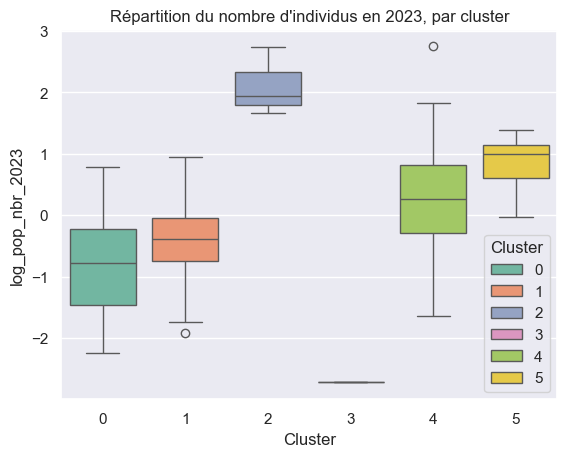

In [62]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='log_pop_nbr_2023', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition du nombre d\'individus en 2023, par cluster')
plt.show()



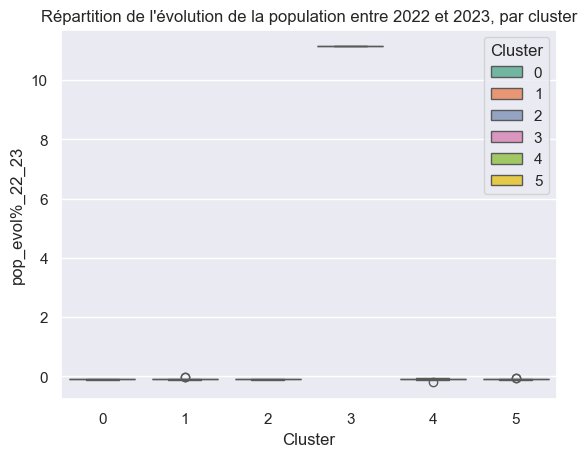

In [63]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='pop_evol%_22_23', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition de l\'évolution de la population entre 2022 et 2023, par cluster')
plt.show()

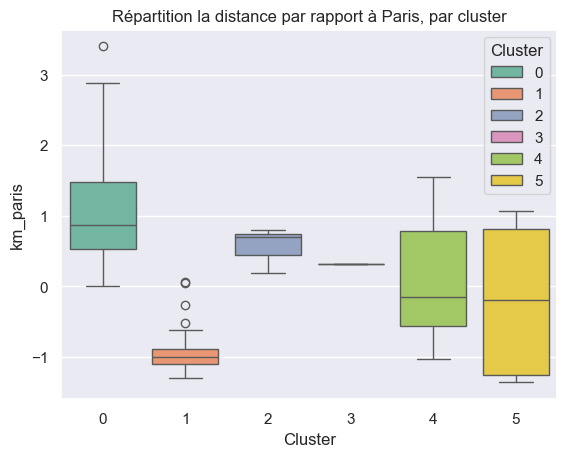

In [64]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='km_paris', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition la distance par rapport à Paris, par cluster')
plt.show()

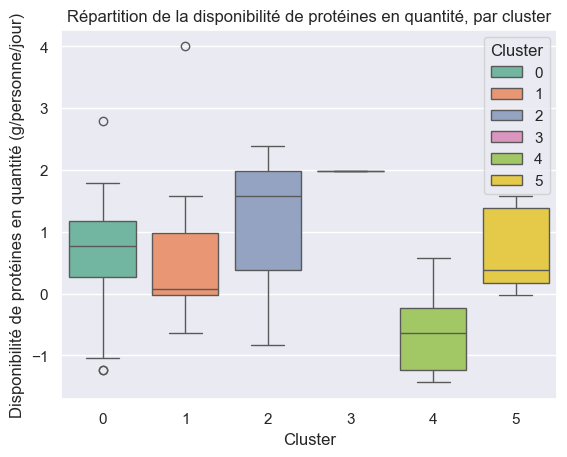

In [65]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition de la disponibilité de protéines en quantité, par cluster')
plt.show()

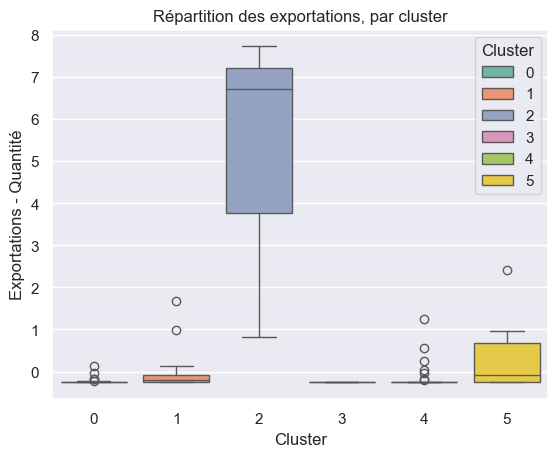

In [66]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Exportations - Quantité', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition des exportations, par cluster')
plt.show()

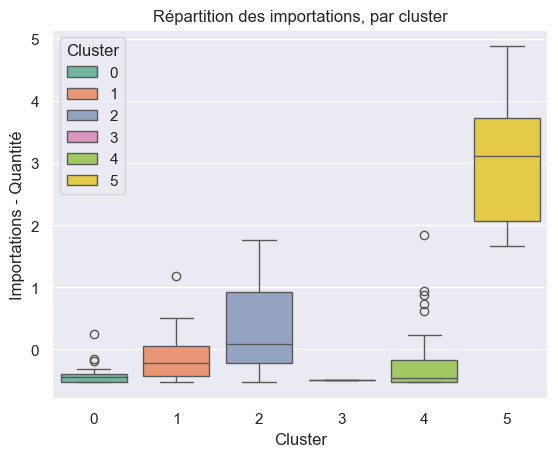

In [67]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Importations - Quantité', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition des importations, par cluster')
plt.show()

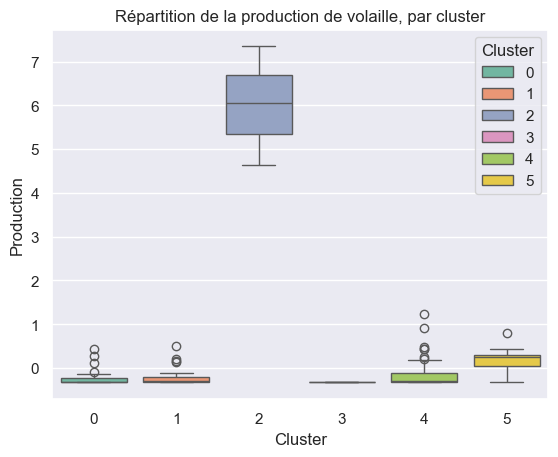

In [68]:
# Création du boxplot, coloration par cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Production', hue='Cluster', data=df_merged, palette='Set2')
plt.title('Répartition de la production de volaille, par cluster')
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">IX.3 - Le tableau de coordonnées moyennes des clusters</h3>
</div>

In [69]:
## La heatmap permet de voir la corrélation entre les variables et les différents clusters.

In [70]:
# Changement de l'index = colonne Pays
df_merged2 = df_merged.set_index('Pays')
display(df_merged2.head())

,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Cluster
Pays,,,,,,,,,,,
Angola,-0.762,-0.737,-1.056,0.667,-0.065,0.268,-0.835,-0.260,0.869,-0.315,4
Albanie,0.183,-0.488,0.741,-0.791,-0.111,-0.961,-0.230,-0.260,-0.342,-0.325,4
Émirats arabes unis,0.911,1.346,0.198,-0.036,-0.055,-0.048,1.381,-0.082,1.660,-0.313,5
Argentine,0.029,-0.268,-1.130,0.789,-0.100,1.409,1.179,0.132,-0.494,0.427,0
Arménie,-0.949,-0.474,1.843,-0.765,-0.077,-0.502,-0.432,-0.260,-0.357,-0.326,4


In [71]:
# Groupement des données par cluster et calcul des moyennes
cluster_means = df_merged2.groupby('Cluster').mean()
cluster_means.round(3)

,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
Cluster,,,,,,,,,,
0,0.709,-0.199,0.470,-0.773,-0.092,1.244,0.654,-0.222,-0.415,-0.213
1,0.810,1.074,-0.565,-0.379,-0.090,-0.914,0.414,-0.059,-0.130,-0.206
2,-0.294,0.598,0.373,2.112,-0.101,0.559,1.045,5.094,0.442,6.016
3,1.213,0.054,0.381,-2.722,11.134,0.319,1.985,-0.260,-0.499,-0.329
4,-0.746,-0.613,0.140,0.302,-0.089,-0.012,-0.657,-0.198,-0.258,-0.146
5,0.340,0.742,-0.406,0.858,-0.088,-0.274,0.687,0.394,3.094,0.214


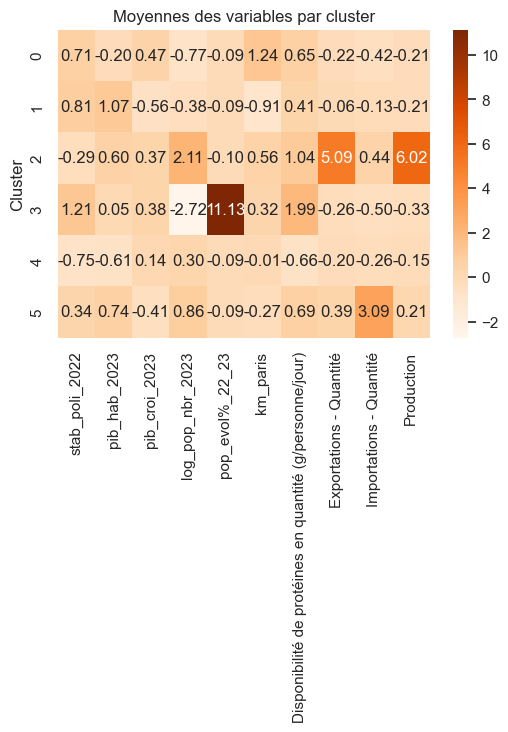

In [72]:
# Création de la heatmab
plt.figure(figsize=(6, 4))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='Oranges')
plt.title('Moyennes des variables par cluster')
plt.show()


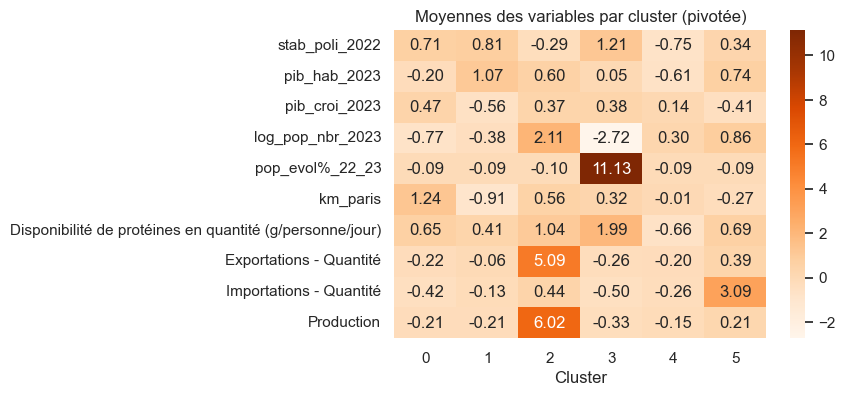

In [73]:
# Transposition de la matrice
cluster_means_transposed = cluster_means.transpose()

# Création de la heatmap pivotée
plt.figure(figsize=(6, 4))
sns.heatmap(cluster_means_transposed, annot=True, fmt='.2f', cmap='Oranges')
plt.title('Moyennes des variables par cluster (pivotée)')
plt.show()

<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell;">
<h3 style="margin: auto; color: chocolate;">X - LE CHOIX DU CLUSTER ... N°5 !</h3>
</div>

In [74]:
# Réinitialiser l'index et créer une nouvelle colonne 'Pays' à partir de l'ancien index
df_merged2 = df_merged2.reset_index()
df_merged2

,Pays,stab_poli_2022,pib_hab_2023,pib_croi_2023,log_pop_nbr_2023,pop_evol%_22_23,km_paris,Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Cluster
0,Angola,-0.762,-0.737,-1.056,0.667,-0.065,0.268,-0.835,-0.260,0.869,-0.315,4
1,Albanie,0.183,-0.488,0.741,-0.791,-0.111,-0.961,-0.230,-0.260,-0.342,-0.325,4
2,Émirats arabes unis,0.911,1.346,0.198,-0.036,-0.055,-0.048,1.381,-0.082,1.660,-0.313,5
3,Argentine,0.029,-0.268,-1.130,0.789,-0.100,1.409,1.179,0.132,-0.494,0.427,0
4,Arménie,-0.949,-0.474,1.843,-0.765,-0.077,-0.502,-0.432,-0.260,-0.357,-0.326,4
...,...,...,...,...,...,...,...,...,...,...,...,...
120,Viet Nam,0.002,-0.654,0.661,1.237,-0.095,0.943,-0.633,-0.258,0.940,-0.008,4
121,Samoa,1.381,-0.662,1.212,-2.245,-0.096,2.672,2.791,-0.260,-0.448,-0.329,0
122,"Yémen, Rép. du",-3.036,-0.811,-0.941,0.707,-0.066,-0.030,-0.835,-0.260,-0.139,-0.271,4
123,Afrique du Sud,-0.856,-0.575,-0.555,0.975,-0.087,0.816,1.381,-0.141,2.070,0.254,5


In [81]:
# Filtre les lignes où Cluster = 5 ET stab_poli_2022 > 0
df_cluster5 = df_merged2[(df_merged2['Cluster'] == 5) & (df_merged2['stab_poli_2022'] > -0.50)]

# Extraction des valeurs de la colonne "Pays" et les afficher
cluster5_liste_pays = df_cluster5['Pays']
print(cluster5_liste_pays)

2     Émirats arabes unis
30              Allemagne
40                 France
42            Royaume-Uni
61                  Japon
85               Pays-Bas
99        Arabie saoudite
Name: Pays, dtype: object


In [82]:
# Comptabilisation du nombre de pays uniques dans le cluster choisi
cluster5_nbr_pays = cluster5_liste_pays.nunique()
print("Nombre de pays uniques dans le cluster 5:", cluster5_nbr_pays)

Nombre de pays uniques dans le cluster 5: 7


<div style="border: 1px solid chocolate; border-radius: 8px; padding: 20px; background-color: seashell; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: chocolate;">FIN</h3>
</div>